# Hisar Coding Summit: Machine Learning Atölyesi
Hisar Coding Summit 2018'deki Machine Learning atölyesine hoşgeldiniz! Önümüzde birkaç saat içerisinde çeşitli data inceleme, temizleme, görselleştirme teknikleri öğrenecek ve bazı regresyon ve klasifikasyon algoritmalarına giriş yapacağız.

## İlk Adımlar
Bugünkü atölyemiz boyunca, Kaggle Kernel (Jupyter notebook)'lar kullanacağız. Kaggle'da kullanacağımız bütün kütüphaneler önceden yüklü olduğu için, yükleme süreciyle uğraşmamak adına bütün kodlarımızı buradan yazacağız. Ayrıca kod hücrelerini tek tek uygulayabildiğimiz için Jupyter notebook'lar amacımıza çok uygun. Bu kernel'da, sizin de kendi kodlarınızı yazmanız için boş hücreler var. 

Bu kernel'ı değiştirebilmeniz için önce onu fork etmeniz, yani kendi kopyanızı oluşturmanız gerekiyor. Bunu yapmak için sağ üstteki "Fork Notebook" düğmesine basıyoruz. Bunu yaptığınızda, yeni bir sayfada bu kernel'ın editleyebildiğiniz bir hali karşınıza çıkacak.  

![Fork Notebook](https://github.com/nadintamer/Images/blob/master/ForkNotebook.png?raw=true)

### Kernel'lara Kısa bir Giriş
Kernel'ların nasıl çalıştığıyla ilgili çok bir detaya girmemiz gerek yok, sadece basit komutları bilmeniz yeterli olacaktır.

**1)** Yeni bir hücre eklemek için bir hücrenin sağ üst kısmında oklara basın. Yukarı veya aşağı oka basmanıza göre yeni hücre, şu anda içerisinde olduğunuz hücrenin üstüne veya altına gelecektir.

**2)** Bir hücredeki kodu uygulamak için Shift+Enter'a basın. 

Bu defter boyunca **"Sıra Sizde!"** başlıklı kod hücreleri göreceksiniz. Bu hücrelerde, öğrendiklerinizi uyguladığınız kodlar yazacaksınız. Dilerseniz daha fazla hücre ekleyerek farklı komutları deneyebilirsiniz. 

## Makine Öğrenmesine Genel Bir Bakış
Makine öğrenmesi, günümüzün en çok tartışılan teknolojilerinden biridir. Bunun birçok farklı kullanımını sıralayabiliriz:
* Gmail'in yeni gelen e-postaları spam veya spam değil diye ayırması
* Google, Facebook, Amazon, Spotify gibi büyük şirketlerin sizin aldığınız ürün/baktığınız video/dinlediğiniz şarkılara göre yeni ürün/video/şarkı önermesi
* Yüz tanıma teknolojileri
* Sağlık alanında kullanımlar (örneğin bir kanser kütlesinin kötü huylu olup olmadığına karar vermek)
* Bilgisayarların Go, satranç gibi oyunları oynamayı öğrenmesi

Peki makine öğrenmesi temelinde nedir?
![MachineLearning.png](https://github.com/nadintamer/Images/blob/master/MachineLearning.png?raw=true)

Temelde iki farklı çeşit makine öğrenme algoritmaları vardır: 
* **Denetimli öğrenme (supervised learning):** Bu algoritmalara, önceden doğru cevapları bilinen örnekler verilir. Örneğin, dataset'imiz e-postalardan ve spam olup olmadıkların oluşur. Algoritmanın görevi, bu örneklere göre daha önce karşısına çıkmayan bir e-postanın spam olup olmadığına karar vermektir.  
* **Denetimsiz öğrenme (unsupervised learning):** Bu algoritmalara, ne aradıkları aslında söylenmez. Algoritmalar, data'da bir nevi örüntüler (pattern) arar. Buna örnek olarak, algoritmanın bir şirketin müşterilerini harcama alışkanlıklarına göre farklı gruplara kümelere ayırması verilebilir.

Bu iki tür algoritmalara örnekleri, atölyemiz boyunca inceliyor olacağız. Şimdi yeterince teori konuştuk, haydi kodlamaya başlayalım!

## 1. Kütüphaneleri Import Etme
Data analizinde kullanılan temel kütüphaneleri import ediyoruz ve data kaynaklarımıza bakıyoruz. Kullanacağımız regresyon ve klasifikasyon algoritmalarını daha sonra import edeceğiz. Bu kodu uygulamak için Shift+Enter'a basın.

In [2]:
# Kaggle'a önceden yüklü olarak gelen python kütüphanelerini aşağıdaki linkten inceleyebilirsiniz:
# https://github.com/kaggle/docker-python

#data analiz kütüphaneleri 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

#data görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# "../input/" directory'mizdeki data kaynaklarına bakalım. 
# Atölye boyunca birçok farklı dataset'ten yararlanacağız.
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

## 2. Data'ya Giriş
Makine öğrenmesiyle veya data analiziyle ilgili çalışan herhangi bir insanın size söylebileceği gibi, **data her şeydir!** Bu işi profesyonel yapan insanlar bile vakitlerinin çoğunu model yaratarak veya algoritmalarla uğraşarak değil, data'yı temizleyerek ve feature engineering (özelliklerden yararlanarak yeni özellikler geliştirme) yaparak geçirirler. Bu nedenle bugün makine öğrenme algoritmalarının yanı sıra, data inceleme, görselleştirme ve temizleme teknikleri de öğreneceğiz.
 
![DataScientist.png](https://github.com/nadintamer/Images/blob/master/DataScientist.png?raw=true)

## `read_csv()` ve `describe()` fonksiyonları
İlk işimiz, elimizdeki veriyi okumak olacak. Kaggle'daki çoğu dataset, .csv (comma separated values) halinde bulunur. Bu tip veriyi okumak için `pandas` kütüphanesinin `read_csv()` fonksiyonunu kullanırız. Daha sonra `head()` veya `tail()` metotlarını kullanarak verilere bir bakış atabiliriz. Bu iki metot herhangi bir sayı verilmediği takdirde ilk 5 veya son 5 sırayı gösterir, ancak sayı vererek (örneğin `head(3)`) daha az veya fazla sırayı da inceleyebiliriz.

`describe()` fonksiyonu ise datamızı özetler. Normalde sadece sayısal özellikleri (birazdan bunu konuşacağız) gösterir, ancak dilersek `describe(include="all")` diyerek diğer özellikleri de inceleyebiliriz.

In [3]:
# mısır gevrekleriyle ilgili dataset'imizi okuyarak cereal adlı bir değişkende depoluyoruz
cereal = pd.read_csv('../input/80-cereals/cereal.csv')
# head() fonksiyonunu kullanarak dataset'in ilk dört sırasına bakıyoruz
cereal.head(4)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [4]:
#describe() fonksiyonuyla dataset'in özetine bakıyoruz
cereal.describe(include="all")

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Shredded Wheat spoon size,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


Dikkat ederseniz, `describe()` fonksiyonunun verdiği tabloda `NaN` diye bir değer var. Bu, "not a number" demektir ve kısaca böyle bir sayının olmadığını söyler. Örneğin dataset'teki farklı isimler sayısal olmadığı için ortalamasını (mean) hesaplayamayız. Aynı şekilde `calories` sonsuz sayıda farklı değer alabileceği için bu sütundaki farklı değer sayısını (unique) hesaplayayız. Birazdan özellik tiplerini konuştuğumuza bunlar daha mantık olacak :) 

### Sıra Sizde!

In [5]:
# "../input/starbucks-menu/starbucks_drinkMenu_expanded.csv" uzantılı dataset'i okuyup
# starbucks adlı bir değişkende depolayın. sonra head fonksiyonunu kullanarak ilk altı sırasına bakın.



In [6]:
# describe() metotunu kullanarak starbucks dataset'inin bir özetine bakın.
# tüm sütunları görmek için include="all" demeyi unutmayın!


## Feature (Özellik) Tipleri
Bir dataset'teki her sütun, verinin belli bir özelliğini temsil eder. Bunlara feature (özellik) denir. Temel olarak iki çeşit özellik vardır: **Sayısal** ve **kategorik**.
* **Sayısal özellikler:** Adı üzerinde sayısal değerleri ifade ederler. Bunlar yaş, boy, kilo, uzaklık gibi özellikler olabilir.
    * **Devamlı (continuous):** Sayısal özellikler devamlı (continuous) olabilir, yani sonsuz sayıda farklı değer alabilir. Örneğin kilo 64.5 kg, 64.54 kg vs. şeklinde devam edebilir. 
    * **Ayrık (discrete):** Sayısal özellikle ayrık (discrete) de olabilir. Bu genellikle tam sayılarda görülür. Örneğin bir ailedeki insan sayısı, sadece tam sayı olabilir. 
* **Kategorik özellikler:** Genellikle string'ler ile ifade edilen, ve sınırlı bir sayıda farklı değer alabilen  özelliklerdir. Örneğin araba modeli, şehir, renk gibi özellikler kategorik özelliklerdir.
    * **Ordinal:** Kategorik özelliklerin belli bir sıralaması varsa bunlara ordinal özellikler denilir. Ordinal özelliklere örnek olarak mutlu-nötr-mutsuz üçlemesi verilebilir. Sadece bu üç değerden birini alabilse de belli bir sıralama vardır. Bir diğer örnek, ilkokul-ortaokul-lise olabilir.
    
Mısır gevrekleriyle ilgili dataset'imize geri dönerek orada özelliklerin tiplerine bakalım.

In [7]:
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Burada gördüğümüz çoğu özellik (örneğin `rating`, `calories`, veya `protein`) sayısal özelliklerdir. `mfr`, `type` ve `name` kategorik özelliklerdir.

### `dtypes` metotu
`dtypes` metotu, bir Pandas dataframe'indeki tüm sütunların data tiplerini verir. Bu, datanızı temizlemeniz açısından önemlidir. Örneğin, sayısal olması gereken bir değer object olarak gözüküyorsa (string'ler object olarak gözükür) datanızla biraz oynamanız gerekebilir.

In [8]:
cereal.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

### Sıra Sizde!
`starbucks` dataset'indeki hangi özellikler sayısal? Hangileri kategorik? Ordinal veya nominal özellikler görüyor musunuz?

In [9]:
# starbucks dataset'ine dtypes metotunu uygulayarak data tiplerinin tahminlerinize uygun olup olmadığına bakın!


## Data Slicing
Her zaman verimizin tamamını aynı anda görmek istemeyiz, sadece bir sıraya veya bir sütuna bakmak isteriz. Bunun için bugün kullanacağımız temel birkaç fonksiyon var.

### `shape` metotu
`shape` metotu, bir `DataFrame`'deki sıra ve sütun sayısını verir. Verilen ilk sayı sıra sayısı, ikinci sayı ise sütun sayısıdır. Örneğin `cereal` dataset'inde 77 sıra, 16 sütun vardır.

In [12]:
cereal.shape

(77, 16)

### Sıra Sizde!
`shape` metotunu kullanarak `starbucks` dataset'inin sıra ve sütun sayısına bakın.

In [13]:
# starbucks dataset'ine shape metotunu uygulayın


### `columns` metotu
`columns` metotunu kullanarak, bir `DataFrame`'in sütunlarının adlarının bir listesini görebiliriz. Aynı zamanda bu metotu kullanarak sütunların isimlerini değiştirebiliriz.

In [14]:
# columns metotunu kullanarak cereal dataset'inin sütun adlarını inceliyoruz
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [15]:
# columns metotuyla cereal dataset'indeki sütunların adlarını değiştiriyoruz (potass ve mfr sütunlarının)
# listedeki isimlerin sırasına dikkat edin!
cereal.columns = ['name', 'manufacturer', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potassium', 'vitamins', 'shelf', 'weight', 'cups',
       'rating']
cereal.head()

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### Sıra Sizde!
`columns` metotunu kullanarak `starbucks` dataset'indeki sütunların adlarına bakın ve bunları aşağıdaki listeyle değiştirin. Tek tek sütunlarla daha kolay çalışabilmek için sütun isimlerini kısaltıyoruz.

`['beverage_category', 'beverage', 'beverage_prep', 'calories', 'total_fat', 'trans_fat', 'saturated_fat', 'sodium',
'total_carbs', 'cholesterol', 'dietary_fibre', 'sugars', 'proteins', 'vitamin_A', 'vitamin_C', 'calcium', 'iron', 'caffeine']`

In [16]:
# columns metotuyla starbucks dataset'inin sütun isimlerine bakın


In [17]:
# columns metotuyla starbucks dataset'inin sütun isimlerini yukarıdaki listeyle değiştirin
# yeni sütun isimlerine bakmak için head() fonksiyonunu kullanın


### `DataFrame` vs. `Series`
Şimdiye kadar çalıştığımız bütün dataset'ler, birer `Pandas DataFrame`'di. Bu `DataFrame`'ler, `Series`'lerden oluşurlar. Dataset'in her sütunu, bir `Series`'dir.  

### `DataFrame`'in Bir Özelliğini Alma 
Bazen, bir dataset'in sadece bir özelliğine (sütununa) bakmak isteriz. Bunun için "dot notation" (`dataframe.ozellik`) veya "bracket notation" (`dataframe['ozellik']`) kullanabiliriz. 

In [18]:
# dot notation kullanarak cereal dataset'inin calories sütununu alıyoruz
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alıyoruz
cereal.calories.head(10)

0     70
1    120
2     70
3     50
4    110
5    110
6    110
7    130
8     90
9     90
Name: calories, dtype: int64

In [19]:
# bracket notation kullanarak cereal dataset'inin fiber sütununu alıyoruz
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alıyoruz
cereal['fiber'].head(10)

0    10.0
1     2.0
2     9.0
3    14.0
4     1.0
5     1.5
6     1.0
7     2.0
8     4.0
9     5.0
Name: fiber, dtype: float64

### Sıra Sizde!
Dot notation kullanarak, `starbucks` dataset'inin `calories` sütununu alın.

In [20]:
# dot notation kullanarak starbucks dataset'inin calories sütununu alın
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alın


Bracket notation kullanarak, `starbucks` dataset'inin `sodium` sütununu alın.

In [21]:
# bracket notation kullanarak starbucks dataset'inin sodium sütununu alın
# çok uzun olmaması için head fonksiyonuyla ilk 10 değeri alın


### Conditional Selection
Bazen sadece belli verileri görmek isteriz. Bunun için conditional selection denilen bir şey kullanabiliriz.

In [55]:
# cereal'ın sadece fiber'ın 8'den büyük olduğu sıralarına bakıyoruz
cereal[cereal['fiber'] >= 8]

,name,manufacturer,type,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


### Sıra Sizde!
Conditional selection kullanarak, `starbucks` dataset'inde sadece `trans_fat` sütunun değerinin 1'e eşit ya da daha büyük olduğu sıralar bakın!

In [ ]:
# conditional selection ile trans_fat'in >= 1 olduğu sıralara bakın


## Data Görselleştirme
Biz insanlar, sadece bir dataset'teki sayılara baktığımızda aklımızda bunların anlamına dair kolayca bir fikir oluşturamayız. Bu nedenle, datayı görsel hale getirmek, bize çok yarar sağlayacaktır. Bunun için Python'ın `matplotlib` ve `seaborn` kütüphanelerini kullanacağız.

### Bar Chart (Sütün Grafiği)
Bar chart yani sütün grafiği, kategorik özellikleri incelemek için çok yararlıdır. `cereal` dataset'indeki farklı mısır gevreği üreticilerini incelemek için bir bar chart çizeceğiz.

In [22]:
sns.set_style("darkgrid") # bu satır, seaborn'un kullanacağı stili belirliyor, grafiklerimize çok bir etkisi yok.

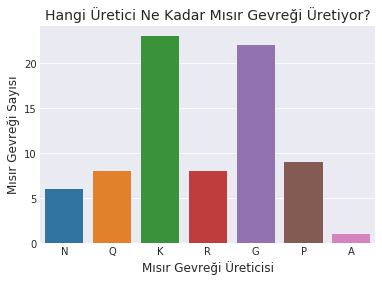

In [23]:
# describe() metotundaki unique sırasını hatırlayın! kaç farklı kategorik özellik olduğunu sayıyordu.
# örneğin, cereal dataset'imizde yedi farklı mısır gevreği üreticisi var. 
# countplot, her farklı özelliğin dataset'te kaç kere bulunduğunu göstere bir grafik çizer.
sns.countplot(x='manufacturer',data=cereal)
plt.xlabel('Mısır Gevreği Üreticisi', fontsize=12) # x ekseninin etiketini ve etiketin font büyüklüğünü ayarlıyoruz
plt.ylabel('Mısır Gevreği Sayısı', fontsize=12) # y ekseninin etiketini ve etiketin font büyüklüğünü ayarlıyoruz
plt.title('Hangi Üretici Ne Kadar Mısır Gevreği Üretiyor?', fontsize=14) # grafiğimizin başlığını koyuyoruz
plt.show() # grafiği gösteriyoruz

### Sıra Sizde!
`starbucks` dataset'inin `beverage_category` sütunu için bir `countplot` yaratın! Acaba Starbucks'ın menüsünde en çok hangi tip içecekler var? 

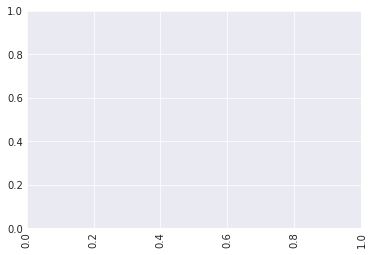

In [24]:
plt.xticks(rotation=90, fontsize=10) # bu satır, x eksenindeki tüm etiketleri 90 derece döndürüyor ki hepsi okunabilsin.

# seaborn'un countplot fonksiyonunu kullanarak beverage_category özelliği için bir countplot çizin!

# x eksenini etiketleyin

# y eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

Sıra geldi, ikinci bir bar chart çizmeye. Şimdiye kadar sadece bir kategorik özelliğin dataset'te kaç kere olduğuna baktık. Peki bir kategorik özellikle bir sayısal özelliği karşılaştırabilir miyiz? Örneğin, hangi üreticinin rating'leri en yüksek? 

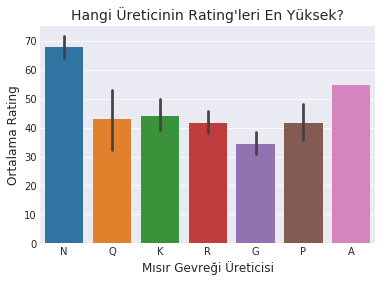

In [25]:
# barplot, x eksenindeki her kategori için y eksenindeki özelliğin (calories) ortalamasını hesaplar.
sns.barplot(x='manufacturer',y='rating',data=cereal)
plt.xlabel('Mısır Gevreği Üreticisi', fontsize=12) # x ekseninin etiketini ve etiketin font büyüklüğünü ayarlıyoruz
plt.ylabel('Ortalama Rating', fontsize=12) # y ekseninin etiketini ve etiketin font büyüklüğünü ayarlıyoruz
plt.title('Hangi Üreticinin Rating\'leri En Yüksek?', fontsize=14) # grafiğimizin başlığını koyuyoruz 
plt.show() # grafiğimizi gösteriyoruz

Görüyoruz ki N üreticisinin (ki bu da daha önce adını hiç duymadığım Nabisco isimli Amerikan bir markaymış) rating'leri diğerlerine kıyasla en yüksek. 

### Sıra Sizde!
`starbucks` dataset'indeki `beverage_category` ve `calories` sütunlarını karşılaştıran bir `barplot` çizin! En sevdiğiniz içecekte ne kadar kalori var?

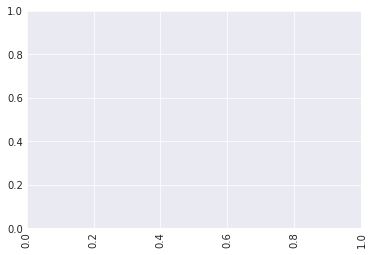

In [26]:
plt.xticks(rotation=90, fontsize=10) # bu satır, x eksenindeki tüm etiketleri 90 derece döndürüyor ki hepsi okunabilsin.

# seaborn'un barplot fonksiyonunu kullanarak beverage_category ve calories özellikleri için bir barplot çizin!

# x eksenini etiketleyin

# y eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

### Histogram
Sayısal bir özelliğin dağılımını görmek için histogram veya distplot (distribution plot) çizebiliriz. Haydi `cereal` dataset'indeki `sodium` özelliğinin dağılımını inceleyelim!

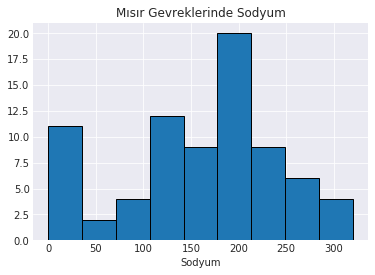

In [27]:
sodium = cereal['sodium'] # sodium sütununu alıyoruz
plt.hist(sodium, bins = 9, edgecolor = "black") # histogramı çiziyoruz
# bins kaç tane aralık olacağını belirliyor. edgecolor'la aralıkların kolay ayırt edilmesi için kenar çizgisi ekliyoruz.
plt.xlabel("Sodyum") # x eksenine etiket ekliyoruz
plt.title("Mısır Gevreklerinde Sodyum") # başlık ekliyoruz
plt.show() #grafiği gösteriyoruz

### Sıra Sizde!
`starbucks` dataset'indeki `total_carbs` sütunu için bir histogram çizin. 

In [28]:
# total_carbs sütununu carbs adlı bir değişkende depolayın

# matplotlib'in hist fonksiyonunu kullanarak total_carbs sütunu için bir histogram çizin!
# parametre olarak bins = 9 ve edgecolor = 'black' kullanın

# x eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

### Distplot (Distribution Plot)

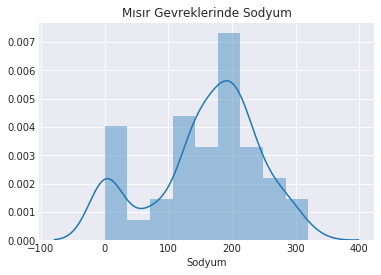

In [29]:
sns.distplot(sodium) # sodium için distplot çiziyoruz
plt.xlabel("Sodyum") # x eksenine etiket ekliyoruz
plt.title("Mısır Gevreklerinde Sodyum") # başlık ekliyoruz
plt.show() # grafiği gösteriyoruz

### Sıra Sizde!
`starbucks` dataset'indeki `total_carbs` sütunu için bir distplot çizin. 

In [30]:
# seaborn'un distplot fonksiyonunu kullanarak total_carbs sütunu için bir distribution plot çizin!

# x eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

### Scatter Plot
Bir scatter plot kullanarak, iki sayısal özelliğin arasındaki ilişkiyi görebiliriz.

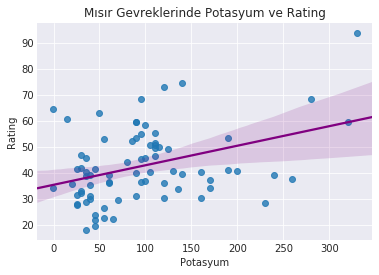

In [31]:
sns.regplot(x='potassium',y='rating',data=cereal, line_kws={'color':'purple'}) # scatter plot'u çiziyoruz
plt.xlabel('Potasyum') # x eksenine etiket ekliyoruz
plt.ylabel('Rating') # y eksenine etiket ekliyoruz
plt.title('Mısır Gevreklerinde Potasyum ve Rating') # başlik ekliyoruz
plt.show() # grafiği gösteriyoruz

### Sıra Sizde!
`starbucks` dataset'indeki `cholesterol` ve `sugars` sütunları için bir scatter plot çizin.

In [32]:
# seaborn'un regplot fonksiyonunu kullanarak cholesterol ve sugars sütunları için bir scatter plot çizin!

# x eksenini etiketleyin

# y eksenini etiketleyin

# grafiğin başlığını koyun

# grafiği gösterin!
plt.show()

### Correlation Heatmap
Correlation heatmap, aynı anda bir dataset'teki tüm sütunların birbirleriyle ilişkilerini görmekte kullanabileceğimiz bir araçtır.

In [33]:
# bir correlation table görmek için corr() metotunu kullanabiliriz, ancak sonuç kolayca yorumlanamaz
cereal.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potassium,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potassium,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


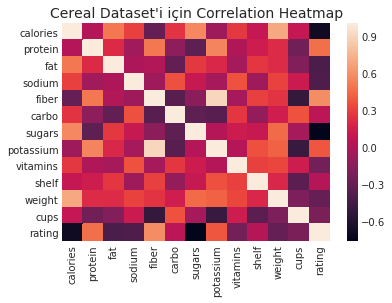

In [34]:
# bu nedenle seaborn'un heatmap fonksiyonunu kullanarak bir correlation heatmap çizeriz
sns.heatmap(cereal.corr())
plt.title('Cereal Dataset\'i için Correlation Heatmap', fontsize=14)
plt.show()

### Sıra Sizde!
`starbucks` dataset'i için bir correlation heatmap çizin!

In [35]:
# heatmap ve corr fonksiyonlarını kullanarak starbucks dataset'i için bir correlation heatmap çizin

# grafiğin başlığını ekleyin

# grafiği gösterin!
plt.show()

## 3. Klasifikasyon
Makine öğrenmesinde en temel algoritma tiplerinden biri, klasifikasyon algoritmalarıdır. Bunlar, kategorik bir değer tahmin ederler (yani verileri klasifiye ederler). Bugün kullanacağımız modelin adı, Decision Tree yani Karar Ağacı'dır. Decision Tree, veriyi doğrusal bir şekilde ayırarak ilerler. Amacı, her ayrıldığında saflığını maksimum hale getirmektir.

![DecisionTree-ud120.png](https://github.com/nadintamer/Images/blob/master/DecisionTree-ud120.png?raw=true)

In [36]:
# meme kanseriyle ilgili verileri yüklüyoruz ve bir pandas dataset'ine çeviriyoruz
from sklearn import datasets
cancer = datasets.load_breast_cancer()
cancer.feature_names
cancerdf = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancerdf['type'] = cancer.target
cancerdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


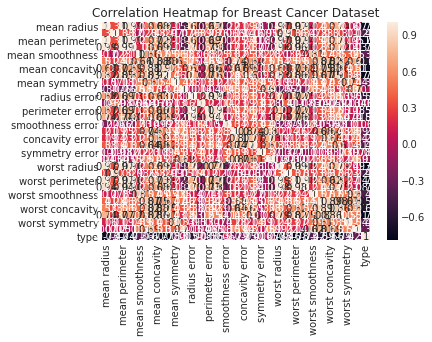

In [37]:
# seaborn'un heatmap fonksiyonunu kullanarak bir correlation heatmap çiziyoruz
# annot = True parametresiyle correlation değerlerinin heatmap üstünde gösterilmesini sağlıyoruz
sns.heatmap(cancerdf.corr(), annot=True)
# grafiğe başlık ekliyoruz
plt.title('Correlation Heatmap for Breast Cancer Dataset')
# grafiği gösteriyoruz
plt.show()

In [38]:
# DecisionTreeClassifier algoritmasını ve accuracy_score fonksiyonunu import ediyoruz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# decisiontree adlı bir değişkende yeni bir DecisionTreeClassifier objesi tanımlıyoruz
decisiontree = DecisionTreeClassifier()

# cancerdf dataframe'inin ilk 50 sırasını test olarak, geriye kalan sıraları ise train olarak tanımlıyoruz
train = cancerdf[50:]
test = cancerdf[:50]

# x_train'i train'in type (yani tahmin etmeye çalıştığımız değerin) drop edilmiş hali olarak tanımlıyoruz
x_train = train.drop('type', axis=1)
# y_train'i train'in type sütunu olarak tanımlıyoruz
y_train = train['type']

# aynısını test için de yapıyoruz
x_test = test.drop('type', axis=1)
y_test = test['type']

# decisiontree adlı modelimizi x_train, y_train verilerine göre fit ediyoruz
decisiontree.fit(x_train, y_train)

# decisiontree modeline x_test hakkında tahmin yaptırıp pred değişkeninde saklıyoruz
pred = decisiontree.predict(x_test)

# accuracy_score fonksiyonuyla modelimizin doğruluğunu kontrol ediyoruz
print("accuracy:", accuracy_score(y_test, pred))

accuracy: 0.9


### Sıra Sizde!
Şekerlerle ilgili bir dataset'te bir şekerin çikolata içerip içermediğini tahmin etmeye çalışan bir model yaratalım!

In [39]:
# "../input/the-ultimate-halloween-candy-power-ranking/candy-data.csv" uzantılı dataset'i okuyup 
# candy adlı bir değişkende depolayın

# head fonksiyonuyla ilk beş sırasına bakın

In [40]:
# dt adlı bir değişkende yeni bir DecisionTreeClassifier objesi tanımaylın

# test'i candy'nin ilk 25 sırası, train'iyse geri kalan tüm sıralar olacak şekilde tanımlayın



# x_train'i train'in ['chocolate', 'competitorname'] sütunlarının drop edilmiş hali yapın
# (competitorname sütununu sayısal bir özellikl olmadığından drop ediyoruz)

# y_train'i train'in chocolate sütunu olarak tanımlayın

# aynısını x_test ve y_test için de yapın


# dt modelini x_train, y_train verilerine göre fit edin

# dt'ye x_test göre tahmin yaptırıp preds adlı bir değişkende depolayın

# accuracy_score fonksiyonuyla modelinizin doğruluğunu kontrol edin


## 4. Linear Regression (Doğrusal Regresyon)
Linear regression yani doğrusal regresyon ile, sayısal bir özelliği tahmin edebiliriz. Burada temelde yaptığımız şey, hatayı yani asıl değerlerden olan farkı en aza indiren bir doğru çizmektir.

Coefficients: 
 [[ 4.81361681]]
Mean Squared Error: 2140.96770937


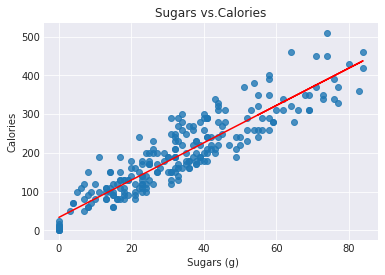

In [42]:
# starbucks menüsünü yükleyip starbucks adlı bir değişkende depoluyoruz
starbucks = pd.read_csv('../input/starbucks-menu/starbucks_drinkMenu_expanded.csv')

# mean_squared_error ve linear_model'ı import ediyoruz
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

# train ve test setlerimizi tanımlıyoruz
sugar = starbucks[' Sugars (g)'].to_frame()
calories = starbucks['Calories'].to_frame()

sugar_train = sugar[20:]
calories_train = calories[20:]

sugar_test = sugar[:20]
calories_test = calories[:20]

# model adlı bir değişkende yeni bir LinearRegression objesi tanımlıyoruz
model = linear_model.LinearRegression()

# modelimizi sugar_train, calories_train verilerine göre fit ediyoruz
model.fit(sugar_train, calories_train)

# modele tahmin yaptırıp predictions adlı bir değişkende depoluyoruz
predictions = model.predict(sugar_test)

# çizdiğimiz doğrunun katsayısını ve mean squared error'ına bakıyoruz
print('Coefficients: \n', model.coef_)
print('Mean Squared Error:', mean_squared_error(calories_test, predictions))

# linear regresyon modelimizi görsel hale getiriyoruz
sns.regplot(x=' Sugars (g)', y='Calories', data=starbucks, fit_reg=False)
plt.plot(sugar, model.predict(sugar), color='red')
plt.title('Sugars vs.Calories')
plt.show()

## Proje 1: TMDb Film Dataseti
![MoviesDataset.png](https://github.com/nadintamer/Images/blob/master/MoviesDataset.png?raw=true)

Bu projede inceleyeceğimiz dataset, The Movies Database (TMDb)'den toplanmış film verilerinden oluşuyor. Bu dataset'te filmlerin konusu, türü, popülerliği, aldığı ortalama ve aldığı oy sayısıyla ilgili bilgiler var. Bakalım bunlardan bir şeyler öğrenebilecek miyiz?

In [44]:
# veriyi yükleyip ilk beş sırasına bakıyoruz
movies = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
genres = movies['genres']
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [45]:
# film türlerinin dağılımını ve aldıkları ortalama puanı incelemek için veriyi hazırlıyoruz
import json

def transformGenres(g):
    copy = genres.copy()
    x = 0
    for genreList in genres:
        genreList = json.loads(genreList)
        genreListNew = []
        for y in genreList:
            genreListNew.append(y['name'])
        copy[x] = genreListNew
        x += 1
    return copy

newGenres = transformGenres(genres)
movies['genres'] = newGenres

def uniqueGenres(genreList):
    unique = []
    for movie in genreList:
        for genre in movie:
            if [genre, 0, 0] not in unique:
                unique.append([genre, 0, 0])
    return unique

unique = uniqueGenres(movies['genres'])

for x in unique:
    for y in range(movies.shape[0]):
        if x[0] in movies.iloc[y]['genres']:
            x[1] += 1
            x[2] += movies.iloc[y]['vote_average']
    x[2] /= x[1]
            
uniquedf = pd.DataFrame(unique, columns=['genre','count', 'average_rating'])
uniquedf.head(10)

,genre,count,average_rating
0,Action,1154,5.989515
1,Adventure,790,6.156962
2,Fantasy,424,6.096698
3,Science Fiction,535,6.005607
4,Crime,696,6.274138
5,Drama,2297,6.388594
6,Thriller,1274,6.010989
7,Animation,234,6.341453
8,Family,513,6.029630
9,Western,82,6.178049


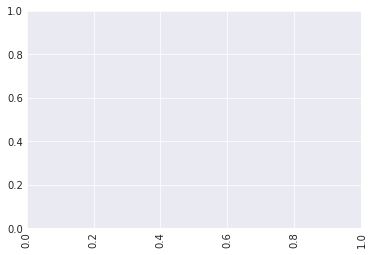

In [46]:
# seaborn'un barplot fonksiyonunu kullanarak uniquedf'in genre ve count sütunları için bir grafik çizin

# grafiği x etiketlerini çevirip grafiği gösteriyoruz
plt.xticks(rotation=90)
plt.show()

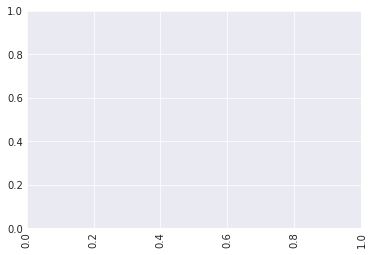

In [47]:
# seaborn'un barplot fonksiyonunu kullanarak uniquedf'in genre ve average_rating sütunları için bir grafik çizin

# grafiği x etiketlerini çevirip grafiği gösteriyoruz
plt.xticks(rotation=90)
plt.show()

In [48]:
# seaborn'un regplot fonksiyonunu kullanarak movies'in budget ve revenue sütunları için bir grafik çizin

# grafiği gösterin
plt.show()

## Proje 2: Spotify's Top Tracks of 2017
![TopTracksOf2017.png](https://github.com/nadintamer/Images/blob/master/TopTracksOf2017.png?raw=true)

Şimdi inceleyeceğimiz dataset, Spotify'ın her sene oluşturduğu Top Tracks of XXXX playlist'i hakkında. Bu dataset'i oluştururken Spotify API'sını kullanarak Top Tracks of 2017 playlist'indeki her şarkının audio features'larını (işitsel özelliklerini) aldım. Bunlar danceability, energy, tempo vs. gibi özellikler. Bakalım bu dataset'i inceleyerek, insanların sevdiği müzik türleri hakkında bir şeyler öğrenebilecek miyiz?

In [49]:
# "../input/top-tracks-of-2017/featuresdf.csv" uzantılı dataset'i okuyup spotify adlı bir değişkende depolayalım

# head fonksiyonuyla ilk beş sırasına bakalım


`spotify` dataset'indeki özelliklerin tipleri neler? Kategorik mi, sayısal mı?

In [50]:
# describe fonksiyonuyla dataset'in bir özetine bakalım (include='all')


İnsanların tercih ettiği müzik türlerini daha iyi anlayabilmek için belli başlı özellikler için birer `distplot` çizelim.

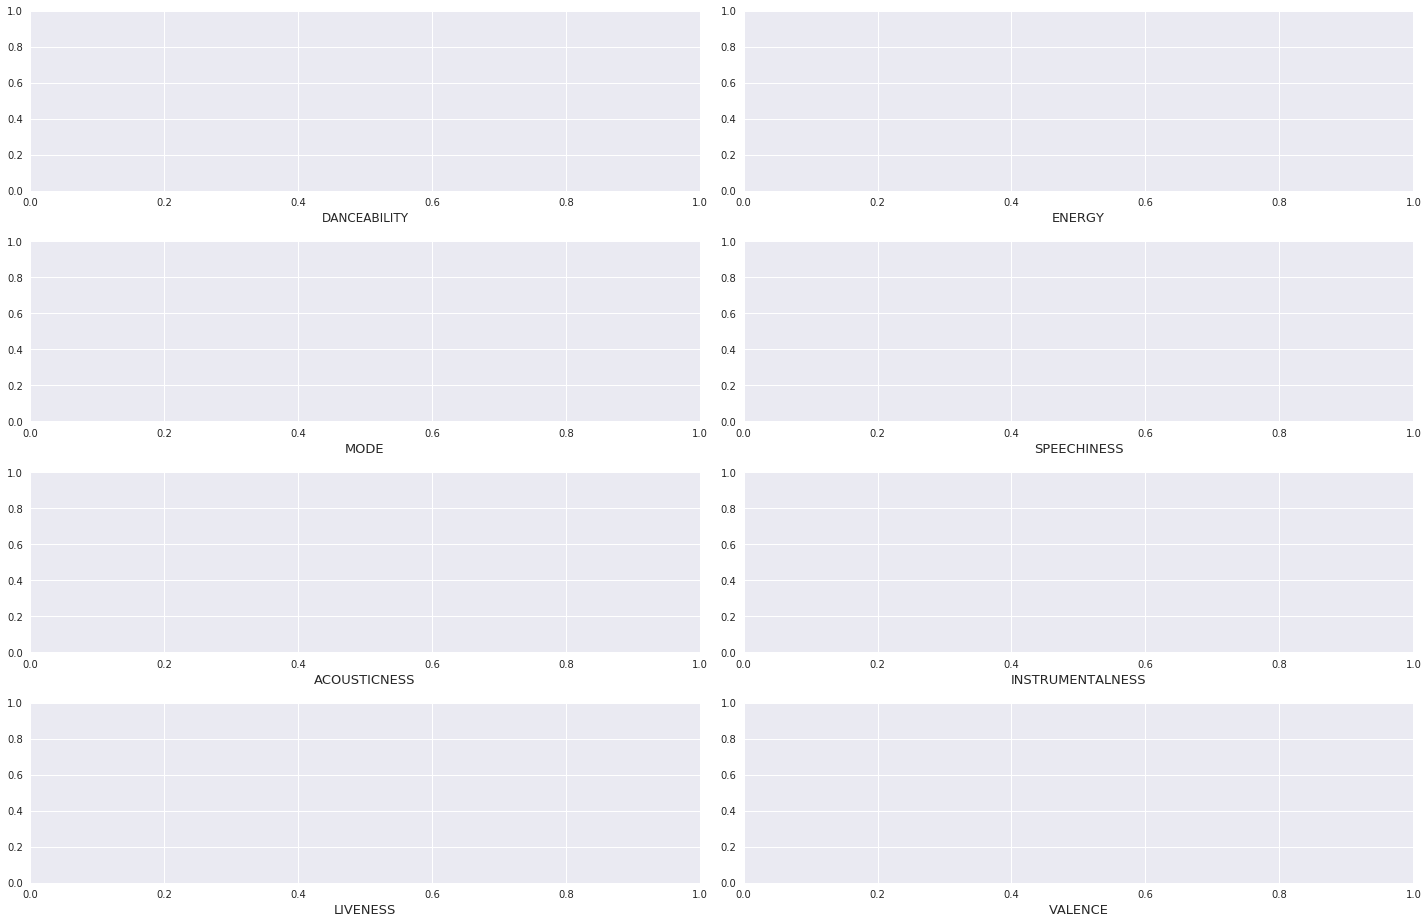

In [51]:
# figure büyüklüğüne karar verelim
sns.set(rc={'figure.figsize':(20,13)})

# Danceability
plt.subplot(421)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('DANCEABILITY', fontsize=12)
plt.legend(fontsize=12)

# Energy
plt.subplot(422)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('ENERGY', fontsize=13)
plt.legend(fontsize=13)

# Mode
plt.subplot(423)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('MODE', fontsize=13)
plt.legend(fontsize=13)

# Speechiness
plt.subplot(424)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('SPEECHINESS', fontsize=13)
plt.legend(fontsize=13)

# Acousticness
plt.subplot(425)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('ACOUSTICNESS', fontsize=13)
plt.legend(fontsize=13)

# Instrumentalness
plt.subplot(426)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('INSTRUMENTALNESS', fontsize=13)
plt.legend(fontsize=13)

# Liveness
plt.subplot(427)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('LIVENESS', fontsize=13)
plt.legend(fontsize=13)

# Valence
plt.subplot(428)
# SİZİN KODUNUZ AŞAĞIYA

plt.xlabel('VALENCE', fontsize=13)
plt.legend(fontsize=13)

plt.tight_layout()
plt.show()

In [52]:
# seaborn'un regplot fonksiyonunu kullanarak spotify'in loudness ve energy sütunları için bir grafik çizin

# grafiği gösterin
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# loudness ve energy sütunlarını alarak birer dataframe'e çevirin



# ikisinin de ilk 10 sırasını loudness_test ve energy_test olarak depolayın



# ikisinin de kalan sıralarını loudness_train ve energy_train olarak depolayın



# spotifyModel adlı bir değişkende yeni bir LinearRegression objesi tanımlayın


# spotifyModel'i loudness_train, energy_train verileriyle fit edin


# spotifyModel'a loudness_test'e göre tahmin yaptırın ve tahminleri spotifyPred adlı bir değişkende saklayın


# spotifyModel'in katsayılarına ve mean squared error'ına bakın
print('Coefficients: \n', spotifyModel.coef_)
print('Mean Squared Error:', mean_squared_error(energy_test, spotifyPred))

# modelinizi görsel hale getirin
sns.regplot(x='loudness', y='energy', data=spotify, fit_reg=False, color='red')
plt.plot(loudness, spotifyModel.predict(loudness), color='green')
plt.title('Loudness vs. Energy')
plt.show()